# Create media designs for DBTL 1 and DBTL 2

This notebook generates the initial media designs. We use ART's capability to provide initial designs for media components for which to get phenotypic data. These designs and phenotypic data will be used later to predict new designs. 

As this is the initial round of designs, we use Latin Hypercube sampling.


We include a desing that is very close to the standard media (up to 10% variation for each component), as a control for every cycle.

Tested using **ART 3.9.4** kernel on jprime.lbl.gov

## Inputs and output

**Required file to run this notebook:**
- `Putida_media_bounds.csv`
- `standard_recipe_concentrations.csv`

**File generated by running this notebook**
- `recommendations_initial.csv`

The files are stored in the user defined directory. 

## Setup

Clone the git repository with the `ART` library 

`git clone https://github.com/JBEI/AutomatedRecommendationTool.git`  
<!-- <font color='red'> _____ -->
<!-- **WE SHOULD TALK ABOUT LICENSING HERE!!!** </font> -->

or pull the latest version. 

Information about licensing ART is available at https://github.com/JBEI/ART.

Importing needed libraries:

In [50]:
import sys
sys.path.append('../../AutomatedRecommendationTool')        # Make sure this is the location for the ART library 
sys.path.append('../')
    
from art.core import * 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## User parameters

### Defining media components and the number of instances (designs) to be created

In [51]:
CYCLE = 1

user_params = {
    'bounds_file': f'../flaviolin data/Putida_media_bounds.csv',
    'output_file_path': f'../flaviolin data/DBTL{CYCLE}', # Folder for output files,
    'standard_media_file': '../flaviolin data/standard_recipe_concentrations.csv',
}

Specify which components to explore:

In [52]:
user_params['components'] = [
    'H3BO3[mM]',
    'K2SO4[mM]',
    'K2HPO4[mM]',
    'FeSO4[mM]',
    'NH4Cl[mM]',
    'MgCl2[mM]',
    'NaCl[mM]',
    '(NH4)6Mo7O24[mM]',
    'CoCl2[mM]',
    'CuSO4[mM]',
    'MnSO4[mM]',
    'ZnSO4[mM]'
]

Here we specify how many instances (designs) we want to create and how many replicates (change as desired). In this case we run two DBTL cycles with initial designs, 12 instances with 4 replicates for each, out of which one design is reserved for the control.

In [53]:
user_params['n_instances'] = 30
user_params['n_replicates'] = 3

In [54]:
df_stand = pd.read_csv(user_params['standard_media_file']).set_index("Component")

In [55]:
df_stand

,Concentration,Solubility
Component,,
MOPS[mM],40.00000,1700.00
Tricine[mM],4.00000,500.08
H3BO3[mM],0.00400,700.00
Glucose[mM],20.00000,5045.63
K2SO4[mM],0.29000,636.98
K2HPO4[mM],1.32000,8564.84
FeSO4[mM],0.01000,1645.73
NH4Cl[mM],9.52000,6543.28
MgCl2[mM],0.52000,569.27


### Generate the control media 

Control media will be uniformly drawn from the interval 90% to 110% around the standard recipe.

In [56]:
ub = 1.1
lb = 0.9
df_control = pd.DataFrame(columns=user_params['components'])

for component in user_params['components']:
    stand_conc = df_stand.loc[component]['Concentration']
    df_control.at[0, component] = stand_conc*np.random.uniform(lb, ub)
    df_control.at[1, component] = stand_conc*np.random.uniform(lb, ub)


In [57]:
df_control

,H3BO3[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM]
0,0.003902,0.317207,1.312346,0.009853,9.731379,0.548221,54.873776,0.000027,0.000272,0.00009,0.00073,0.000093
1,0.00435,0.316635,1.373984,0.009343,9.152222,0.515452,52.58102,0.000031,0.000325,0.000091,0.000793,0.00009


### Random media

Read bounds:

In [58]:
df_bounds = pd.read_csv(user_params['bounds_file'])

In [59]:
df_bounds

,Variable,Min,Max
0,H3BO3[mM],0.000400,0.0400
1,K2SO4[mM],0.029000,2.9000
2,K2HPO4[mM],0.264000,6.6000
3,FeSO4[mM],0.001000,0.1000
4,NH4Cl[mM],6.346667,14.2800
5,MgCl2[mM],0.052000,5.2000
6,NaCl[mM],5.000000,500.0000
7,(NH4)6Mo7O24[mM],0.000003,0.0003
8,CoCl2[mM],0.000030,0.0030
9,CuSO4[mM],0.000010,0.0010


In [60]:
df_bounds_factor = pd.DataFrame(columns=['Variable', 'Min', 'Max'])
df_bounds_factor['Variable'] = user_params['components']
df_bounds_factor['Min'] = -1*np.ones(12)
df_bounds_factor['Max'] = np.ones(12)
df_bounds_factor

,Variable,Min,Max
0,H3BO3[mM],-1.0,1.0
1,K2SO4[mM],-1.0,1.0
2,K2HPO4[mM],-1.0,1.0
3,FeSO4[mM],-1.0,1.0
4,NH4Cl[mM],-1.0,1.0
5,MgCl2[mM],-1.0,1.0
6,NaCl[mM],-1.0,1.0
7,(NH4)6Mo7O24[mM],-1.0,1.0
8,CoCl2[mM],-1.0,1.0
9,CuSO4[mM],-1.0,1.0


Draw LH samples from [-1, 1]

If [0, 1] map it to [1, 10] or [1, 5] or [1, 1.5].

If [-1, 0] map it to [1/10, 1] or [1/5, 1] or [1/1.5, 1].

In [61]:
mapping = lambda x, factor: 1 + -1*((1/factor) -1)*x if x < 0 else 1 + (factor-1)*x


In [62]:
bounds_factor_file = f'../flaviolin data/Putida_media_bounds_factor.csv'

In [63]:
df_bounds_factor.to_csv(bounds_factor_file)

Define a dictionary that contains the settings that ART will use to find the recommended designs:

In [64]:
art_params = {
    'input_vars': user_params['components'],
    'bounds_file': bounds_factor_file, # file with bounds# input variables, i.e. features
    'num_recommendations': user_params['n_instances'],    # one of them will be wild type
    'initial_cycle': True,                                    # Set this to True for initial designs recommendations
    'seed': 10,                                               # seed for number random generator
    'output_directory': user_params['output_file_path']  # directory to store this output
}


With the configuration stored in `art_params`, we now run ART:

In [65]:
art = RecommendationEngine(**art_params)
df = art.recommendations.copy()
df.tail()

/code/flaviolin notebooks/../art/core/recommendation_engine.py:404: UserWarning: output_directory is a deprecated alias for output_dir. Update your code to use output_dir instead.  The output_directory alias will be removed in a future ART version.
  warnings.warn(
/code/flaviolin notebooks/../art/core/recommendation_engine.py:571: UserWarning: bounds_file is a deprecated parameter. Update your code to use bounds instead.  bounds_file will be removed in a future ART version.
  warnings.warn(


,H3BO3[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM]
25,0.533841,0.591521,0.515786,0.425550,-0.819642,-0.868848,-0.971830,0.234850,0.237185,-0.226511,0.299662,0.960520
26,0.357617,0.217360,-0.258105,-0.952846,0.394845,-0.126771,-0.560864,0.491058,-0.348980,0.951944,-0.919948,-0.844364
27,-0.960796,-0.884446,-0.342108,0.764352,-0.370963,-0.632742,-0.286718,0.536048,-0.483184,-0.733636,-0.792971,-0.157212
28,0.289533,0.710617,-0.987209,-0.379965,0.047081,0.745930,0.164000,-0.515779,-0.860949,-0.299593,-0.201271,0.634472
29,-0.745830,0.517972,0.273116,0.242075,0.821018,-0.008353,0.447024,0.712194,-0.656970,0.290353,-0.003121,0.427202


Transform these bounds into our factors:

In [66]:
df_ranges_factors = df.copy()

factor = {}
for comp in (user_params['components']):
    factor[comp] = np.sqrt(
        df_bounds[df_bounds['Variable']==comp]['Max'] / df_bounds[df_bounds['Variable']==comp]['Min']
    )

for ind in df.index:
    for comp in df.columns:
        df_ranges_factors.at[ind, comp] = mapping(df.at[ind, comp], factor[comp])


/tmp/ipykernel_13819/2468791813.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_ranges_factors.at[ind, comp] = mapping(df.at[ind, comp], factor[comp])


In [67]:
df_ranges_factors.head()

,H3BO3[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM]
0,4.967858,0.709373,1.791727,2.124270,0.669722,8.308505,0.433058,0.753572,4.351678,0.894099,0.756198,5.500703
1,0.979562,6.495388,0.605371,0.953217,0.930735,6.587642,0.300202,3.405454,0.848610,9.375581,8.329051,1.914495
2,0.231926,0.395530,0.567503,2.439166,0.936001,6.303979,0.786281,8.154642,3.884348,0.993957,5.941844,0.573249
3,0.786577,0.535574,0.904287,0.736088,0.690206,5.643585,2.050007,0.477263,0.758529,4.723445,0.137566,0.450044
4,0.165244,0.248652,0.508332,0.317430,1.075148,0.631896,1.394121,0.824087,0.769663,0.846546,0.563003,0.952795


Transform these factors into our ranges:

In [68]:
df_ranges = df.copy()

for comp in df.columns:
    stand_conc = df_stand.loc[comp, 'Concentration']
    df_ranges.loc[:, comp] = stand_conc * df_ranges_factors.loc[:, comp]

In [92]:
df_control.loc[0].to_frame().T

,H3BO3[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM]
0,0.003902,0.317207,1.312346,0.009853,9.731379,0.548221,54.873776,0.000027,0.000272,0.00009,0.00073,0.000093


## Cycle 1

In [95]:
df_target_1 = df_ranges.iloc[:15]
df_target_1 = pd.concat([df_target_1,df_control.loc[0].to_frame().T], axis=0).reset_index(drop=True)
df_target_1


,H3BO3[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM]
0,0.019871,0.205718,2.36508,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.000089,0.000605,0.00055
1,0.003918,1.883663,0.799089,0.009532,8.860595,3.425574,15.010088,0.000102,0.000255,0.000938,0.006663,0.000191
2,0.000928,0.114704,0.749104,0.024392,8.910734,3.278069,39.314072,0.000245,0.001165,0.000099,0.004753,0.000057
3,0.003146,0.155317,1.193659,0.007361,6.570764,2.934664,102.500341,0.000014,0.000228,0.000472,0.00011,0.000045
4,0.000661,0.072109,0.670998,0.003174,10.235412,0.328586,69.706045,0.000025,0.000231,0.000085,0.00045,0.000095
5,0.002896,2.694506,2.705554,0.004145,10.05364,0.203426,392.187867,0.000021,0.000674,0.00033,0.001751,0.000013
6,0.003569,0.134996,5.140924,0.099996,13.04173,0.137271,13.077057,0.000063,0.000118,0.000865,0.000988,0.000108
7,0.002498,0.478785,5.697716,0.005074,12.572632,2.474319,34.381185,0.000199,0.000266,0.0004,0.000188,0.000028
8,0.030307,0.246921,0.344224,0.044398,8.052032,2.115414,373.15833,0.000298,0.001822,0.000683,0.007326,0.000069
9,0.003307,0.220806,1.373433,0.002769,7.072113,0.162127,474.641165,0.000029,0.000468,0.000062,0.007837,0.000019


In [97]:
df_target_2 = df_ranges.iloc[15:]
df_target_2 = pd.concat([df_target_2,df_control.iloc[1].to_frame().T]).reset_index(drop=True)
df_target_2

,H3BO3[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM]
0,0.036568,1.38806,1.010494,0.010567,13.87702,0.762363,44.602736,0.000013,0.000185,0.000018,0.000742,0.000808
1,0.004091,0.285941,1.114373,0.072114,8.571532,0.08034,334.835565,0.000276,0.000065,0.000723,0.000523,0.000719
2,0.002757,0.037187,0.568853,0.006261,11.635449,3.925519,29.412474,0.000007,0.002681,0.000776,0.005502,0.000079
3,0.032674,0.728092,4.631595,0.003782,14.137994,0.256453,28.626215,0.00001,0.000085,0.000037,0.002562,0.000393
4,0.022738,0.265485,0.82967,0.008942,10.869627,0.942635,436.856031,0.000068,0.00207,0.00007,0.006248,0.000073
5,0.027822,0.191012,3.731013,0.05201,12.821188,0.39668,461.365478,0.000151,0.001555,0.000025,0.004012,0.00027
6,0.011578,0.177163,1.834603,0.086358,11.758068,0.449543,199.775436,0.000027,0.000033,0.000142,0.003447,0.00083
7,0.006689,2.358695,1.30699,0.008025,9.467514,0.344166,153.566409,0.000023,0.000535,0.000628,0.000308,0.00033
8,0.001434,0.089205,6.047767,0.039952,7.577229,4.715166,47.895483,0.000006,0.00263,0.000247,0.000471,0.00009
9,0.002166,2.410881,3.296974,0.001977,7.661746,1.344683,17.89684,0.000019,0.002993,0.000012,0.000332,0.000441


### Checking the distribution of initial designs

In [98]:
def designs_pairwise(art, df):

    dim = art.num_input_var

    plt.style.use(["seaborn-talk"])

    fig = plt.figure(figsize=(35, 35))
    fig.patch.set_facecolor("white")

    X = df.values

    for var1 in range(dim):
        for var2 in range(var1 + 1, dim):

            ax = fig.add_subplot(dim, dim, (var2 * dim + var1 + 1))
            ax.scatter(
                X[:, var1],
                X[:, var2],
                c="r",
                edgecolor="r",
                marker="+",
                lw=1,
                label="Train data",
            )
            
            if var2 == (dim - 1):
                ax.set_xlabel(art.input_vars[var1])
            if var1 == 0:
                ax.set_ylabel(art.input_vars[var2])
                if var2 == 0:
                    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), shadow=True)

    fig.savefig(f'{art.outDir}/designs_pairwise.png', transparent=False, dpi=300
    )

/code/flaviolin notebooks/../art/core/recommendation_engine.py:394: UserWarning: num_input_var is deprecated. Update your code to use len(input_vars) instead.  The num_input_var alias will be removed in a future ART version.
  warnings.warn(
/tmp/ipykernel_13819/2920520357.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn-talk"])
/tmp/ipykernel_13819/2920520357.py:16: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/code/flaviolin notebooks/../art/core/recommendation_engine.py:466: UserWarning: RecommendationEngine.outDir is a deprecated alias for output_dir. Update your code to u

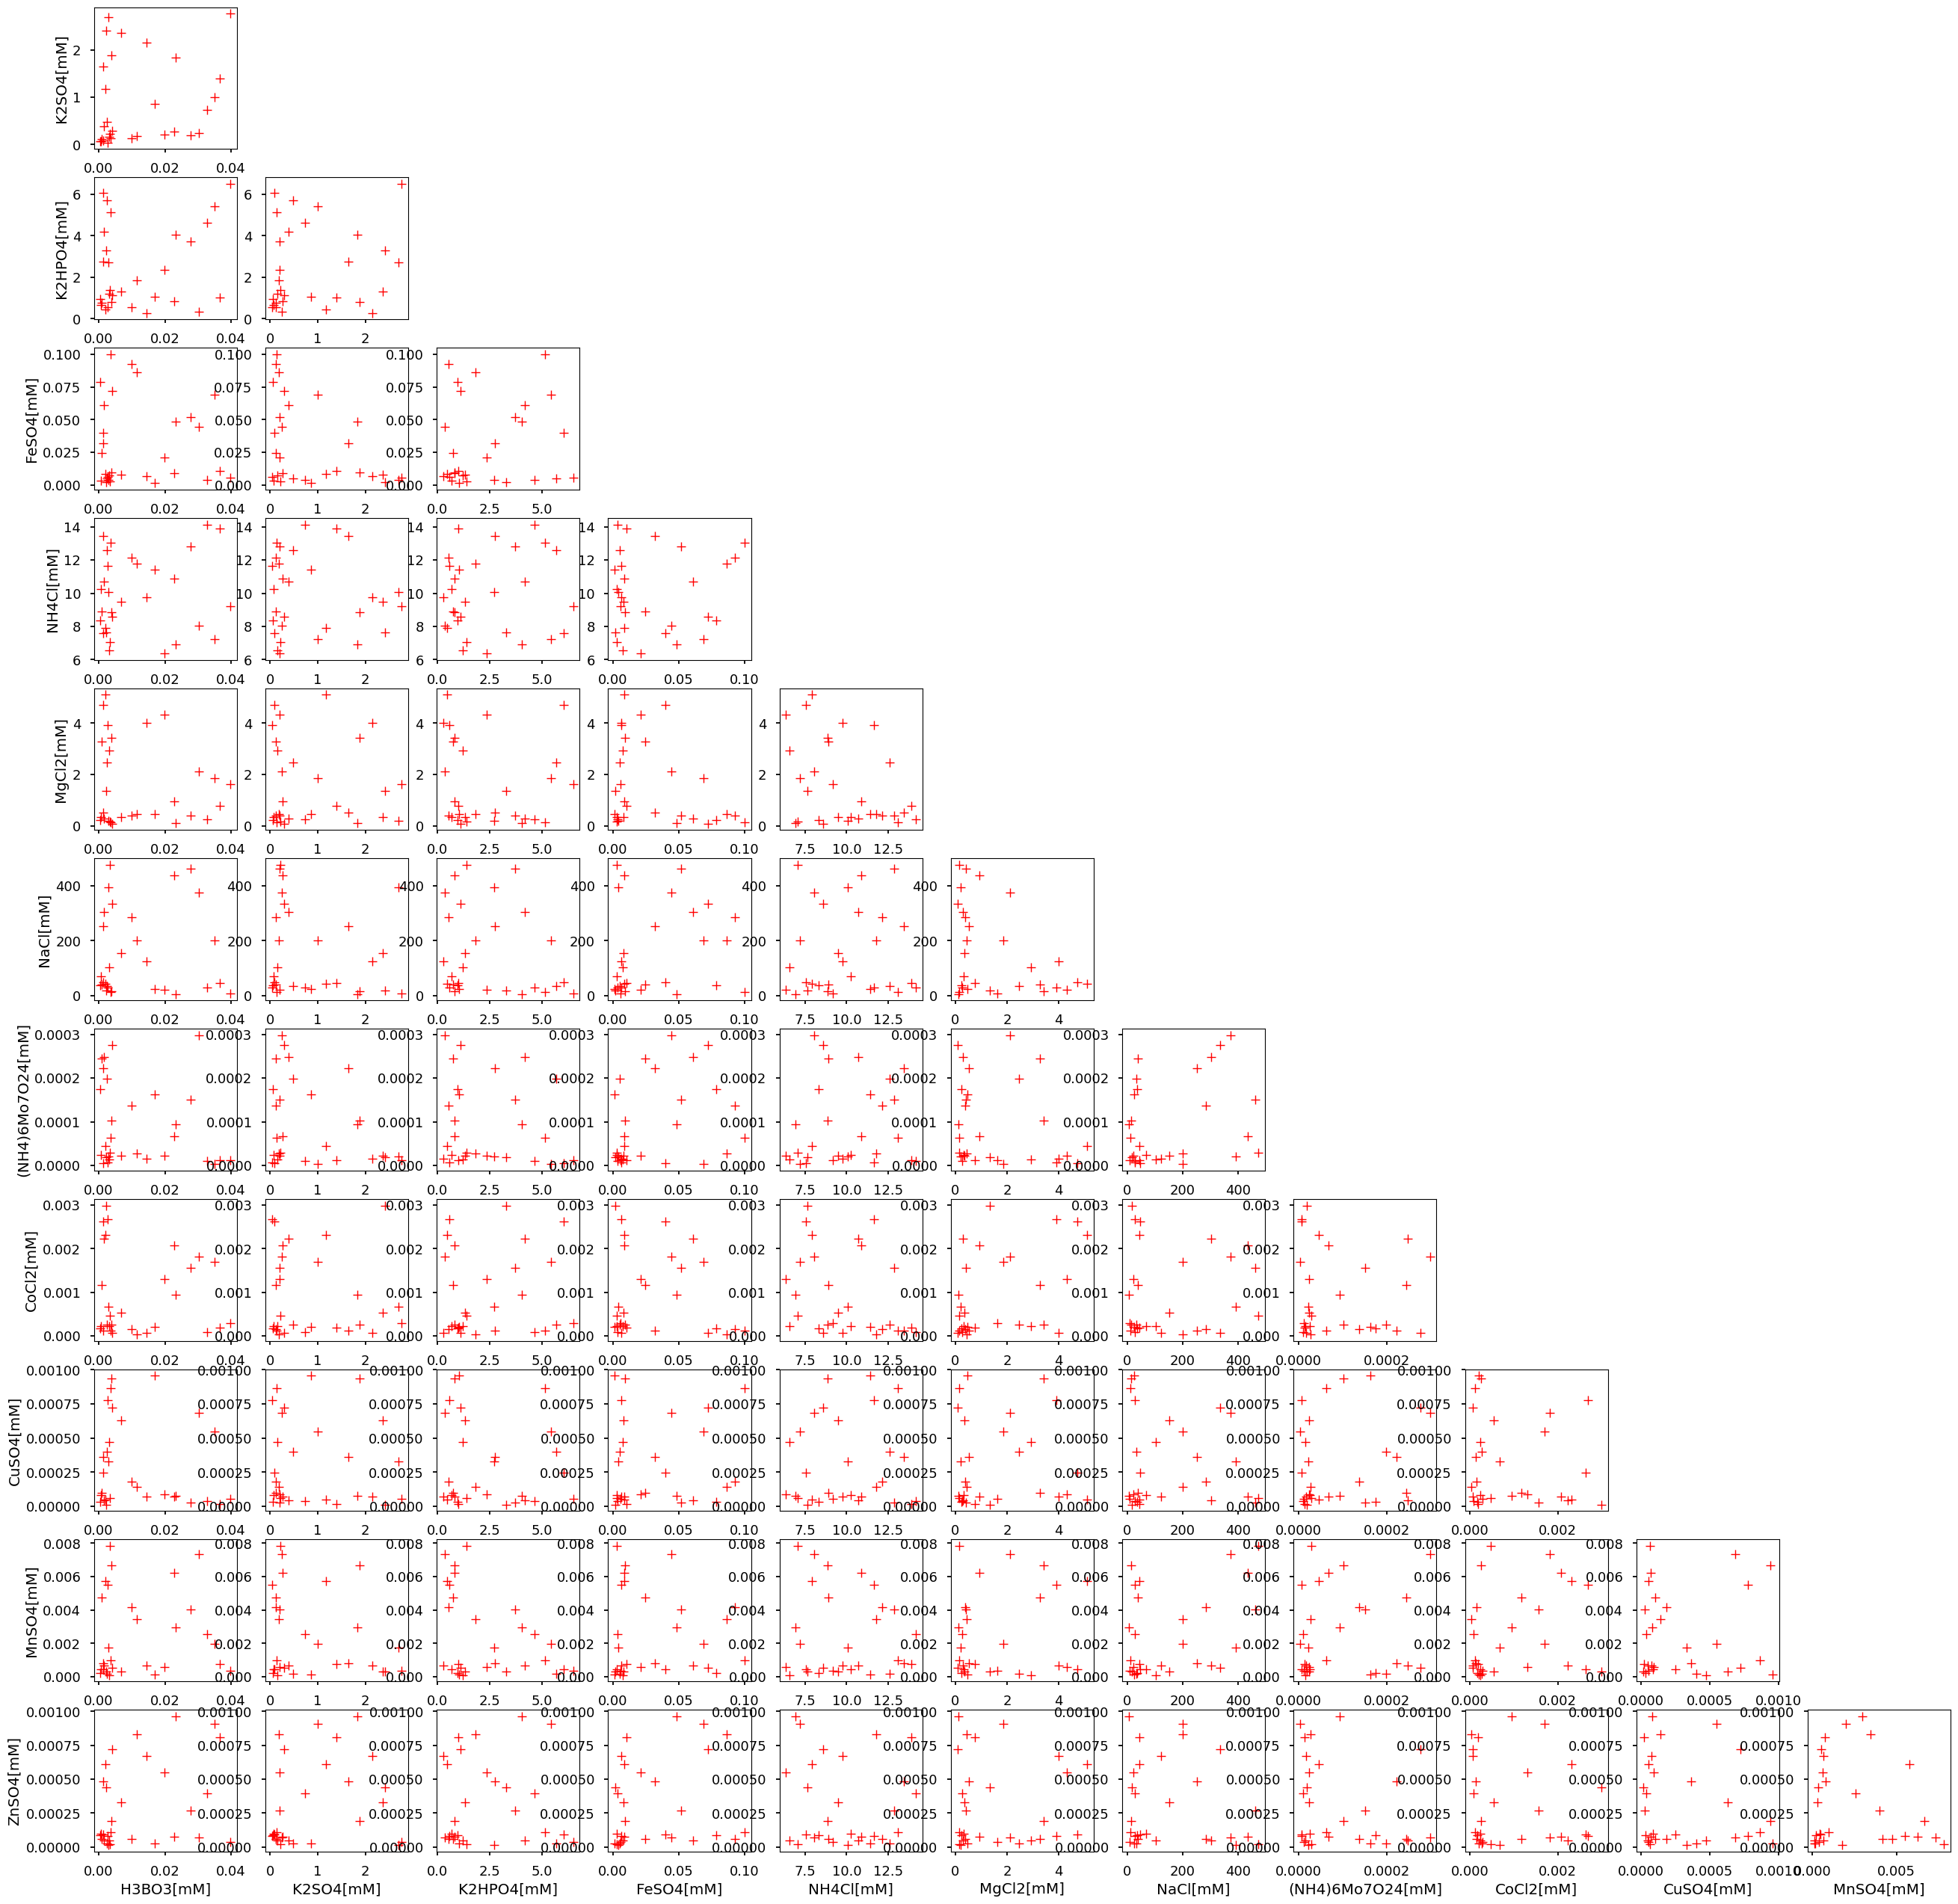

In [99]:
designs_pairwise(art, df_ranges)

## Saving the generated designs

Include all replicates: 

In [100]:
df_target_1 = df_target_1.loc[df_target_1.index.repeat(user_params['n_replicates'])]
df_target_2 = df_target_2.loc[df_target_2.index.repeat(user_params['n_replicates'])]


Rename index to well names:

In [101]:
well_rows = 'ABCDEF'
well_columns = '12345678'

In [102]:
well_names = [f'{row}{column}'  for row in well_rows for column in well_columns]

df_target_1['Well'] = well_names
df_target_1 = df_target_1.set_index(['Well'])
df_target_1

,H3BO3[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM]
Well,,,,,,,,,,,,
A1,0.019871,0.205718,2.36508,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.000089,0.000605,0.00055
A2,0.019871,0.205718,2.36508,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.000089,0.000605,0.00055
A3,0.019871,0.205718,2.36508,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.000089,0.000605,0.00055
A4,0.003918,1.883663,0.799089,0.009532,8.860595,3.425574,15.010088,0.000102,0.000255,0.000938,0.006663,0.000191
A5,0.003918,1.883663,0.799089,0.009532,8.860595,3.425574,15.010088,0.000102,0.000255,0.000938,0.006663,0.000191
A6,0.003918,1.883663,0.799089,0.009532,8.860595,3.425574,15.010088,0.000102,0.000255,0.000938,0.006663,0.000191
A7,0.000928,0.114704,0.749104,0.024392,8.910734,3.278069,39.314072,0.000245,0.001165,0.000099,0.004753,0.000057
A8,0.000928,0.114704,0.749104,0.024392,8.910734,3.278069,39.314072,0.000245,0.001165,0.000099,0.004753,0.000057
B1,0.000928,0.114704,0.749104,0.024392,8.910734,3.278069,39.314072,0.000245,0.001165,0.000099,0.004753,0.000057


In [103]:
file = f'../flaviolin data/DBTL1/target_concentrations.csv'
df_target_1.to_csv(file)

In [104]:
df_target_2['Well'] = well_names
df_target_2 = df_target_2.set_index(['Well'])

In [106]:
file = f'../flaviolin data/DBTL2/target_concentrations.csv'
df_target_2.to_csv(file)